In [34]:
import numpy as np
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression



In [35]:
file = 'owid-covid-data.csv'
URL = "https://covid.ourworldindata.org/data/" + file
if not os.path.isfile(file):
    print('Pobieram plik z ', URL)
    urllib.request.urlretrieve(URL, file)
    print('Pobrano plik')
else:
    print(f'Plik {file} już jest na dysku')

df = pd.read_csv(file)
display(df)

Plik owid-covid-data.csv już jest na dysku


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191371,ZWE,Africa,Zimbabwe,2022-05-30,252092.0,0.0,198.571,5500.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
191372,ZWE,Africa,Zimbabwe,2022-05-31,252398.0,306.0,209.857,5503.0,3.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
191373,ZWE,Africa,Zimbabwe,2022-06-01,252874.0,476.0,235.143,5507.0,4.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
191374,ZWE,Africa,Zimbabwe,2022-06-02,253051.0,177.0,200.714,5508.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [128]:
# wymiary

df.shape

(191376, 67)

In [37]:
# kolumny

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [38]:
# rodzaje danych

df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

# Oczyszczenie danych
Powyższy dataframe zawiera wiele kolumn, większość będzie niepotrzebna.
Do analizy będą potrzebne następujące cztery dataframe'y:
- df_world - do wizulacji danych covidowych na przestrzeni czasu dla świata
- df_main - do sprawdzenia zależności między wybranymi wartościami
- df_income - do wizualizacji zależności między zamożnością państw a covidem
- df_continents - do wizualizacji na podstawie kontynentów

Każdy z tych zbiorów odpowiednio oczyszczę i przygotuje do analizy

#### df_world

In [39]:
df_world = df.loc[df['location'] == 'World'] # wybieram wszystkie wiersze dla świata
df_world=df_world[['location','date','total_cases','total_deaths','new_cases','new_deaths']]  # kolumny które będę potrzebował do wizualizacji

display(df_world)


,location,date,total_cases,total_deaths,new_cases,new_deaths
188113,World,2020-01-22,557.0,17.0,0.0,0.0
188114,World,2020-01-23,657.0,18.0,100.0,1.0
188115,World,2020-01-24,944.0,26.0,287.0,8.0
188116,World,2020-01-25,1437.0,42.0,493.0,16.0
188117,World,2020-01-26,2120.0,56.0,683.0,14.0
...,...,...,...,...,...,...
188972,World,2022-05-30,529081732.0,6290955.0,403183.0,1248.0
188973,World,2022-05-31,529705596.0,6292532.0,623864.0,1577.0
188974,World,2022-06-01,530396073.0,6294648.0,692138.0,2116.0
188975,World,2022-06-02,530917112.0,6296231.0,521039.0,1583.0


In [40]:
df_world.isnull().values.any() # sprawdzam czy dataframe zawiera jakieś braki(wartości NaN)

False

#### df_main
W tym zbiorze każdy wiersz powinien zawierać informacje o covidzie w tym pańswtwie/regionie oraz ogólne informacje(np. PKB na osobę)

Najpierw wybieram niezbędę kolumny z początkowego zbioru

In [41]:
df1=df[['location','continent','total_cases','total_deaths','total_cases_per_million','population_density','gdp_per_capita']]

display(df1)

,location,continent,total_cases,total_deaths,total_cases_per_million,population_density,gdp_per_capita
0,Afghanistan,Asia,5.0,NaN,0.126,54.422,1803.987
1,Afghanistan,Asia,5.0,NaN,0.126,54.422,1803.987
2,Afghanistan,Asia,5.0,NaN,0.126,54.422,1803.987
3,Afghanistan,Asia,5.0,NaN,0.126,54.422,1803.987
4,Afghanistan,Asia,5.0,NaN,0.126,54.422,1803.987
...,...,...,...,...,...,...,...
191371,Zimbabwe,Africa,252092.0,5500.0,16703.495,42.729,1899.775
191372,Zimbabwe,Africa,252398.0,5503.0,16723.770,42.729,1899.775
191373,Zimbabwe,Africa,252874.0,5507.0,16755.310,42.729,1899.775
191374,Zimbabwe,Africa,253051.0,5508.0,16767.038,42.729,1899.775


In [42]:
locations = df['location'].unique().tolist() # lista wszystkich państw/regionów

locations

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


Tworzę pusty zbiór df_main z indeksem ustawionym na lokalizacje

In [43]:
df_main= pd.DataFrame(columns=['Location','Continent', 'Cases', 'Deaths','Incidence_rate','Death_rate', 'Population_density','GDP_per_capita']).set_index('Location')

iteruję po liście lokalizacji i tworzę dataframe z informacjami o każdej z nich

In [44]:
for location in locations:
    df_temp=df1.loc[df1['location'] == location]    # tworze df zawierający wszystkie wiersze dla danego państwa

    # całkowita liczba zgonów
    deaths = df_temp['total_deaths'].max()   # z wszystkich wartosci wybieram tą najwiekszą (tj. ostatni dzień pandemii w zbiorze)

    # całkowita liczba przypadków
    cases = df_temp['total_cases'].max()

    # kontynent
    continent = df_temp['continent'].iloc[0]

    # zachorowalność(tzn. jaka część społeczeństwa zachorowała na COVID), w zbiorze jest kolumna o liczbach przypadków na milion osób
    # dzieląc przez milion otrzymujemy współczynnik[0;1], gdzie 1 oznacza że każda osoba w społeczeństwie zachorowała
    incidence_rate = (df_temp['total_cases_per_million'].max() ) / 1000000
    incidence_rate = float('{:.4f}'.format(round(incidence_rate, 4)))  # zaokrąglenie do 4 miejsc po przecinku

    # śmiertelność czyli liczbaZgonów/liczbaZachorowań, oznacza jaka cześć osób zarażonych zmarła.
    death_rate = 0
    if cases!=0 :
        death_rate = deaths/cases
    death_rate = float('{:.4f}'.format(round(death_rate, 4))) # zaokrąglenie do 4 miejsc po przecinku

    # gęstość zaludnienia, liczbaOsób/km2
    population_density = df_temp['population_density'].iloc[0]

    # PKB na mieszkańca
    gdp = df_temp['gdp_per_capita'].iloc[0]

    # Jednowierszowy df w celu konkatenacji z df_main
    df_temp2 = pd.DataFrame({'Location':[location],'Continent':[continent], 'Cases': [cases], 'Deaths': [deaths],'Incidence_rate':[incidence_rate], 'Death_rate' : [death_rate], 'Population_density': population_density, 'GDP_per_capita': gdp }).set_index('Location')

    df_main = pd.concat([df_main, df_temp2])

In [45]:
display(df_main)

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Afghanistan,Asia,180584.0,7708.0,0.0045,0.0427,54.422,1803.987
Africa,NaN,11900199.0,254186.0,0.0087,0.0214,NaN,NaN
Albania,Europe,276310.0,3497.0,0.0962,0.0127,104.871,11803.431
Algeria,Africa,265889.0,6875.0,0.006,0.0259,17.348,13913.839
Andorra,Europe,43067.0,155.0,0.5568,0.0036,163.755,NaN
...,...,...,...,...,...,...,...
Western Sahara,Africa,NaN,NaN,NaN,NaN,NaN,NaN
World,NaN,531456131.0,6297755.0,0.0675,0.0118,58.045,15469.207
Yemen,Asia,11822.0,2149.0,0.0004,0.1818,53.508,1479.147


Zbiór zawiera wartości NaN w każdej kolumnie. Pozbędę się ich w zależności od kolumny.
Dla kolumn: Cases, Deaths, Incidence_rate, Death_rate* - NaN zastąpie zerem. Są to bardzo małe państwa/regiony np. wysepki na pacyfiku
Pozostałe kolumny zastąpie średnią kolumny.


*regiony dla których kolumny Cases, Deaths mają wartości NaN postanowiłem jednak usunąć. Tutaj wytłumaczę moją decyzję.
Większość tych regionów to jakieś małe wysepki na pacyfiku. Populacja tych miejsc to kilka-kilkanaście tysięcy osób.
Na próżno doszukiwać się w tych miejscach zależności między PKB czy gęstością zaludnienia a zachorowalnością, skoro jedyny wpływ na ich sytuację covidową ma fakt, że są to malutkie, odizolowane społeczeństwa na środku ocenu.

Na początku analizę chciałem przeprowadzić tylko dla oficjalnych 195 państw. W tym celu chciałem pobrać listę państw z internetu i porównywać nazwy z tymi występującymi w moim zbiorze. Niestety występowało sporo anomalii przy nazwach państw w zależności od źródła
np. Czechia - Czech Republic czy United States - United States of America; zamiast 195 państw zostałoby np. 180.
Usunęłęm rownież Koree Północną - 1 przypadek zachorowania i 6 zgonów.

Rozwiązanie, które wybrałem uznałem za sensowne.

Panśtwa/regiony z wszystkimi 4 kolumnami bez danych są poniżej


In [46]:
df_main[df_main['Cases'].isna() & df_main['Deaths'].isna()]

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Guam,Oceania,NaN,NaN,NaN,NaN,304.128,NaN
Guernsey,Europe,NaN,NaN,NaN,NaN,NaN,NaN
Jersey,Europe,NaN,NaN,NaN,NaN,NaN,NaN
Nauru,Oceania,NaN,NaN,NaN,NaN,682.45,12895.635
Niue,Oceania,NaN,NaN,NaN,NaN,NaN,NaN
Northern Cyprus,Asia,NaN,NaN,NaN,NaN,NaN,NaN
Northern Mariana Islands,Oceania,NaN,NaN,NaN,NaN,119.878,NaN
Pitcairn,Oceania,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,North America,NaN,NaN,NaN,NaN,376.232,35044.67


In [47]:
df_main.loc[['North Korea']]

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
North Korea,Asia,1.0,6.0,0.0,6.0,211.701,NaN


In [48]:
df_main = df_main[(~df_main['Cases'].isna() & ~df_main['Deaths'].isnull())]
df_main = df_main.drop('North Korea')

df_main

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Afghanistan,Asia,180584.0,7708.0,0.0045,0.0427,54.422,1803.987
Africa,NaN,11900199.0,254186.0,0.0087,0.0214,NaN,NaN
Albania,Europe,276310.0,3497.0,0.0962,0.0127,104.871,11803.431
Algeria,Africa,265889.0,6875.0,0.006,0.0259,17.348,13913.839
Andorra,Europe,43067.0,155.0,0.5568,0.0036,163.755,NaN
...,...,...,...,...,...,...,...
Wallis and Futuna,Oceania,454.0,7.0,0.0409,0.0154,NaN,NaN
World,NaN,531456131.0,6297755.0,0.0675,0.0118,58.045,15469.207
Yemen,Asia,11822.0,2149.0,0.0004,0.1818,53.508,1479.147


In [49]:
df_main.columns[df_main.isna().any()].tolist() # sprawdzam jakie kolumny zawierają wartości NaN

['Continent', 'Incidence_rate', 'Population_density', 'GDP_per_capita']

Pozbywam się wartości NaN zgodnie z założeniami

In [50]:
df_main=df_main.fillna({'Incidence_rate':0,'Population_density':df_main["Population_density"].mean(),'GDP_per_capita':df_main["GDP_per_capita"].mean()})
df_main

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Afghanistan,Asia,180584.0,7708.0,0.0045,0.0427,54.422000,1803.987000
Africa,NaN,11900199.0,254186.0,0.0087,0.0214,349.318547,18839.445856
Albania,Europe,276310.0,3497.0,0.0962,0.0127,104.871000,11803.431000
Algeria,Africa,265889.0,6875.0,0.0060,0.0259,17.348000,13913.839000
Andorra,Europe,43067.0,155.0,0.5568,0.0036,163.755000,18839.445856
...,...,...,...,...,...,...,...
Wallis and Futuna,Oceania,454.0,7.0,0.0409,0.0154,349.318547,18839.445856
World,NaN,531456131.0,6297755.0,0.0675,0.0118,58.045000,15469.207000
Yemen,Asia,11822.0,2149.0,0.0004,0.1818,53.508000,1479.147000


In [51]:
df_main.columns[df_main.isna().any()].tolist() # sprawdzam jakie kolumny zawierają wartości NaN

['Continent']

Pozostały jeszcze z wiersze z brakiem danych o kontynencie. Przyjżyjmy się tym danym.

In [52]:
df_main[df_main['Continent'].isna()]

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Africa,NaN,11900199.0,254186.0,0.0087,0.0214,349.318547,18839.445856
Asia,NaN,153650427.0,1437220.0,0.0328,0.0094,349.318547,18839.445856
Europe,NaN,199075596.0,1845363.0,0.2658,0.0093,349.318547,18839.445856
European Union,NaN,143149352.0,1095441.0,0.3201,0.0077,349.318547,18839.445856
High income,NaN,309240854.0,2421299.0,0.2545,0.0078,349.318547,18839.445856
International,NaN,721.0,15.0,0.0000,0.0208,349.318547,18839.445856
Low income,NaN,1833057.0,43153.0,0.0028,0.0235,349.318547,18839.445856
Lower middle income,NaN,90864572.0,1310098.0,0.0273,0.0144,349.318547,18839.445856
North America,NaN,100090271.0,1449450.0,0.1678,0.0145,349.318547,18839.445856


Jak widać są to albo kontynenty albo państwa podzielone na podstawie zamożności. PKB jest oczywiście taki sam bo został zmieniony z nulla, ale to nie będzie miało znaczenia i tak.
Lokalizacje zawierające 'income' w nazwie wpiszę do nowego dataframe df_income, a następnie usuniemy wszystkie powyższe wiersze ze zbioru df_main.
Kontynenty do df_continents będę musiał dodać "ręcznie", ponieważ nie da się tego zrobić za pomocą jakieś metody - tak jak dla df_income

In [53]:
df_income = df_main[df_main.index.str.contains('income')]

df_continents = df_main.loc[['Africa']]
df_continents = pd.concat([df_continents, df_main.loc[['Oceania']]])
df_continents = pd.concat([df_continents, df_main.loc[['Europe']]])
df_continents = pd.concat([df_continents, df_main.loc[['Asia']]])
df_continents = pd.concat([df_continents, df_main.loc[['North America']]])
df_continents = pd.concat([df_continents, df_main.loc[['South America']]])

Pozbywam się teraz wszystkich zbędnych wierszy z df_main - czyli tych z wartością NaN w kolumnie Continent

In [54]:
df_main = df_main[df_main['Continent'].notna()]

display(df_main)

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Afghanistan,Asia,180584.0,7708.0,0.0045,0.0427,54.422000,1803.987000
Albania,Europe,276310.0,3497.0,0.0962,0.0127,104.871000,11803.431000
Algeria,Africa,265889.0,6875.0,0.0060,0.0259,17.348000,13913.839000
Andorra,Europe,43067.0,155.0,0.5568,0.0036,163.755000,18839.445856
Angola,Africa,99761.0,1900.0,0.0029,0.019,23.890000,5819.495000
...,...,...,...,...,...,...,...
Vietnam,Asia,10723673.0,43080.0,0.1092,0.004,308.127000,6171.884000
Wallis and Futuna,Oceania,454.0,7.0,0.0409,0.0154,349.318547,18839.445856
Yemen,Asia,11822.0,2149.0,0.0004,0.1818,53.508000,1479.147000


upewnijmy się, że na pewno wszystkie nan'y usunięto

In [55]:
df_main.isnull().values.any()

False

#### df_income

In [56]:
df_income

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
High income,NaN,309240854.0,2421299.0,0.2545,0.0078,349.318547,18839.445856
Low income,NaN,1833057.0,43153.0,0.0028,0.0235,349.318547,18839.445856
Lower middle income,NaN,90864572.0,1310098.0,0.0273,0.0144,349.318547,18839.445856
Upper middle income,NaN,129491858.0,2523129.0,0.0515,0.0195,349.318547,18839.445856


usunę niepotrzebne kolumny

In [57]:
df_income=df_income[['Cases','Deaths','Incidence_rate', 'Death_rate']]

df_income

,Cases,Deaths,Incidence_rate,Death_rate
Location,,,,
High income,309240854.0,2421299.0,0.2545,0.0078
Low income,1833057.0,43153.0,0.0028,0.0235
Lower middle income,90864572.0,1310098.0,0.0273,0.0144
Upper middle income,129491858.0,2523129.0,0.0515,0.0195


#### df_continents

In [58]:
df_continents

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Africa,NaN,11900199.0,254186.0,0.0087,0.0214,349.318547,18839.445856
Oceania,NaN,8912717.0,12600.0,0.2062,0.0014,349.318547,18839.445856
Europe,NaN,199075596.0,1845363.0,0.2658,0.0093,349.318547,18839.445856
Asia,NaN,153650427.0,1437220.0,0.0328,0.0094,349.318547,18839.445856
North America,NaN,100090271.0,1449450.0,0.1678,0.0145,349.318547,18839.445856
South America,NaN,57826200.0,1298921.0,0.1332,0.0225,349.318547,18839.445856


In [59]:
df_continents=df_continents[['Cases','Deaths','Incidence_rate', 'Death_rate']]

df_continents

,Cases,Deaths,Incidence_rate,Death_rate
Location,,,,
Africa,11900199.0,254186.0,0.0087,0.0214
Oceania,8912717.0,12600.0,0.2062,0.0014
Europe,199075596.0,1845363.0,0.2658,0.0093
Asia,153650427.0,1437220.0,0.0328,0.0094
North America,100090271.0,1449450.0,0.1678,0.0145
South America,57826200.0,1298921.0,0.1332,0.0225


# Exploratory Data Analysis(EDA)
<br>

&emsp;&nbsp;Całkowita liczba zachorowań na świecie na przestrzeni czasu

In [60]:
fig = go.Figure(go.Scatter(x=df_world['date'], y=df_world['total_cases']))
fig.update_layout(xaxis_title='Date',yaxis_title='Cases', title_text='Cumulative cases by date',title_x=0.5, plot_bgcolor='#F7F7F7')
fig.show()

Całkowita liczba zgonów na świecie na przestrzeni czasu

In [61]:
fig = go.Figure(go.Scatter(x=df_world['date'], y=df_world['total_deaths'], line_color='red'))
fig.update_layout(xaxis_title='Date',yaxis_title='Deaths',title_text='Cumulative deaths by date',title_x=0.5,plot_bgcolor='#F7F7F7')
fig.show()

In [62]:
fig = px.bar(df_world, x="date", y="new_cases")
fig.update_layout(xaxis_title='Date',yaxis_title='New cases',title_text='New cases by date',title_x=0.5, plot_bgcolor='#F7F7F7')

In [127]:
fig = px.bar(df_world, x="date", y="new_deaths")
fig.update_traces(marker_color='red')
fig.update_layout(xaxis_title='Date',yaxis_title='New deaths',title_text='New deaths by date',title_x=0.5, plot_bgcolor='#F7F7F7')

stopień zachorowalności w zależności od zamożności państw

In [94]:

fig = px.bar(df_income, x=df_income.index, y='Incidence_rate', template='seaborn')
fig.update_layout(xaxis_title='Income of countries',yaxis_title='Incidence rate',title_text='Incidence rate by income',title_x=0.5,barmode='stack', xaxis={'categoryorder':'total descending'})

fig.write_image("images/incidence_rate_income.png")

fig.show()


stopień śmiertelności w zależności od zamożnosći państw

In [95]:
fig = px.bar(df_income, x=df_income.index, y='Death_rate', template='seaborn')

fig.update_traces(marker_color='#BC0A0A')
fig.update_layout(xaxis_title='Income of countries',yaxis_title='Death rate',title_text='Death rate by income',title_x=0.5,barmode='stack', xaxis={'categoryorder':'total descending'})

fig.write_image("images/death_rate_income.png")

fig.show()



In [67]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_income.index, values=df_income.Cases, name='Cases'),
              1, 1)
fig.add_trace(go.Pie(labels=df_income.index, values=df_income.Deaths, name='Deaths'),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Total cases/deaths in the world by income", title_x=0.5,
    annotations=[dict(text='Cases', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Deaths', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [68]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_continents.index, values=df_continents.Cases, name='Cases'),
              1, 1)
fig.add_trace(go.Pie(labels=df_continents.index, values=df_continents.Deaths, name='Deaths'),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Total cases/deaths in the world by continents", title_x=0.5,
    annotations=[dict(text='Cases', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Deaths', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

Top 10 państw na świecie najbardziej zarażonych wirusem

In [69]:
df_cases10 = df_main.sort_values('Cases',ascending = False).head(10)

df_cases10

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
United States,North America,84724329.0,1008422.0,0.2545,0.0119,35.608,54225.446
India,Asia,43172547.0,524677.0,0.0310,0.0122,450.419,6426.674
Brazil,South America,31137479.0,666971.0,0.1455,0.0214,25.040,14103.452
France,Europe,29650183.0,148533.0,0.4398,0.005,122.578,38605.671
Germany,Europe,26493235.0,139386.0,0.3158,0.0053,237.016,45229.245
United Kingdom,Europe,22382336.0,178925.0,0.3282,0.008,272.898,39753.244
South Korea,Asia,18153851.0,24238.0,0.3538,0.0013,527.967,35938.374
Russia,Europe,18076286.0,371703.0,0.1239,0.0206,8.823,24765.954
Italy,Europe,17467642.0,166875.0,0.2894,0.0096,205.859,35220.084


In [70]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig = px.bar(df_cases10, x='Cases', y=df_cases10.index, template='seaborn', orientation='h')
fig.update_traces(marker_color='#2844F9')
fig.update_layout(xaxis_title='Cases',yaxis_title='Country',title_text='Cumulative cases by country',title_x=0.5,barmode='stack',yaxis={'categoryorder':'total ascending'})
fig.show()

top 10 państw z najwięszką ilością zgonów

In [71]:
df_deaths10 = df_main.sort_values('Deaths',ascending = False).head(10)

df_deaths10

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
United States,North America,84724329.0,1008422.0,0.2545,0.0119,35.608,54225.446
Brazil,South America,31137479.0,666971.0,0.1455,0.0214,25.040,14103.452
India,Asia,43172547.0,524677.0,0.0310,0.0122,450.419,6426.674
Russia,Europe,18076286.0,371703.0,0.1239,0.0206,8.823,24765.954
Mexico,North America,5782405.0,324966.0,0.0444,0.0562,66.444,17336.469
Peru,South America,3583403.0,213228.0,0.1074,0.0595,25.129,12236.706
United Kingdom,Europe,22382336.0,178925.0,0.3282,0.008,272.898,39753.244
Italy,Europe,17467642.0,166875.0,0.2894,0.0096,205.859,35220.084
Indonesia,Asia,6056017.0,156604.0,0.0219,0.0259,145.725,11188.744


In [72]:
fig = px.bar(df_deaths10, x='Deaths', y=df_deaths10.index, template='plotly_dark', orientation='h')
fig.update_traces(marker_color='red')
fig.update_layout(xaxis_title='Deaths',yaxis_title='Country',title_text='Cumulative deaths by country',title_x=0.5,barmode='stack',yaxis={'categoryorder':'total ascending'})
fig.show()

10 państw pod względem zachorowalności/śmiertelności

In [73]:
df_inc10 = df_main.sort_values('Incidence_rate',ascending = False).head(10)

df_inc10

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Faeroe Islands,Europe,34658.0,28.0,0.7065,0.0008,35.308000,18839.445856
Andorra,Europe,43067.0,155.0,0.5568,0.0036,163.755000,18839.445856
Gibraltar,Europe,18560.0,102.0,0.5509,0.0055,3457.100000,18839.445856
Cyprus,Europe,491777.0,1067.0,0.5489,0.0022,127.657000,32415.132000
Denmark,Europe,3138678.0,6376.0,0.5399,0.002,136.520000,46682.515000
Iceland,Europe,188924.0,153.0,0.5123,0.0008,3.404000,46482.958000
San Marino,Europe,17124.0,115.0,0.5035,0.0067,556.667000,56861.470000
Slovenia,Europe,1025913.0,6640.0,0.4935,0.0065,102.619000,31400.840000
Netherlands,Europe,8184647.0,22432.0,0.4766,0.0027,508.544000,48472.545000


In [74]:
df_death_rate10 = df_main.sort_values('Death_rate',ascending = False).head(10)

df_death_rate10

,Continent,Cases,Deaths,Incidence_rate,Death_rate,Population_density,GDP_per_capita
Location,,,,,,,
Yemen,Asia,11822.0,2149.0,0.0004,0.1818,53.508000,1479.147000
Sudan,Africa,62374.0,4942.0,0.0014,0.0792,23.258000,4466.507000
Peru,South America,3583403.0,213228.0,0.1074,0.0595,25.129000,12236.706000
Syria,Asia,55894.0,3150.0,0.0031,0.0564,349.318547,18839.445856
Mexico,North America,5782405.0,324966.0,0.0444,0.0562,66.444000,17336.469000
Somalia,Africa,26565.0,1361.0,0.0016,0.0512,23.500000,18839.445856
Egypt,Africa,515645.0,24718.0,0.0049,0.0479,97.999000,10550.206000
Afghanistan,Asia,180584.0,7708.0,0.0045,0.0427,54.422000,1803.987000
Bosnia and Herzegovina,Europe,377962.0,15788.0,0.1158,0.0418,68.496000,11713.895000


In [75]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(x=df_inc10.index, y=df_inc10.Incidence_rate, name='Incidence rate',),
              1, 1)
fig.add_trace(go.Bar(x=df_death_rate10.index, y=df_death_rate10.Death_rate, name='Death rate',),
              1, 2)
fig.update_layout(
    title_text="Incidence/death rate by countries", title_x=0.5,)

fig.show()

Teraz zbadam zależność między gęstością zaludnienia państw a ich zachorowalnością

In [76]:
df_density = df_main

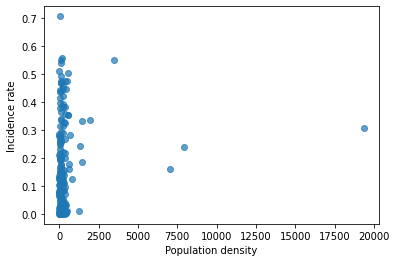

In [77]:
X = df_density['Population_density'].values
Y = df_density['Incidence_rate'].values
plt.scatter(X,Y, alpha=0.7)
plt.xlabel('Population density')
plt.ylabel('Incidence rate')
plt.show()

Z powyższego wykresu ciężko cokolwiek wyczytać. Pozbędę się outlier'ów

In [111]:
df_density = df_main[(df_main['Population_density']<1000) & (df_main['Incidence_rate'] < 0.7)]

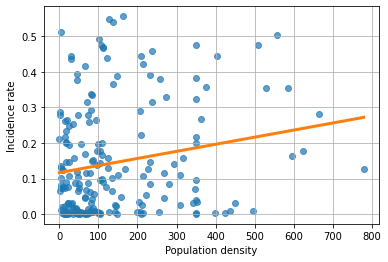

In [112]:
X = df_density['Population_density'].values
Y = df_density['Incidence_rate'].values

model = LinearRegression()
model.fit(X.reshape(-1,1), Y)

X_fit = np.linspace(X.min(), X.max(), 100)
Y_fit = model.predict(X_fit.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_fit, Y_fit, color='tab:orange', linewidth=3)

plt.xlabel('Population density')
plt.ylabel('Incidence rate')

plt.grid()
plt.savefig('images/incidence_density.png')

plt.show()


In [113]:
r = np.corrcoef(X, Y.astype('float32')) # współczynnik korelacji
r[0, 1]

0.19503624721811044

Zależność między PKB na mieszkańca a zachorowalnością

In [115]:
X = df_main['GDP_per_capita'].values
Y = df_main['Incidence_rate'].values
model = LinearRegression()
model.fit(X.reshape(-1,1), Y)

X_fit = np.linspace(X.min(), X.max(), 100)
Y_fit = model.predict(X_fit.reshape(-1,1))


fig = px.scatter(x=X, y=Y)
fig.add_traces(go.Scatter(x=X_fit, y=Y_fit, name='Regression Fit'))

fig.update_layout(xaxis_title='GDP per capita',yaxis_title='Incidence rate',title_text='Incidence rate by GDP per capita',title_x=0.5, width=1000)

fig.show()

pozbędę się kilku outlier'ów
<br>
*do tworzenia wykresów przeznaczonych do pokazania w raporcie skorzystałem z matplotlib, ponieważ lepiej wyglądają w pdfie.

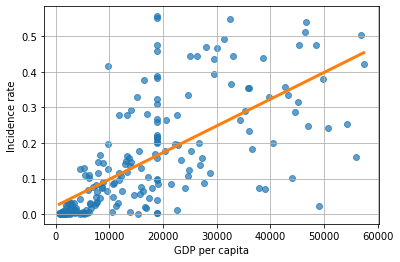

In [117]:
df_temp = df_main[(df_main['GDP_per_capita']<60000) & (df_main['Incidence_rate']<0.7)]

X = df_temp['GDP_per_capita'].values
Y = df_temp['Incidence_rate'].values

model = LinearRegression()
model.fit(X.reshape(-1,1), Y)

X_fit = np.linspace(X.min(), X.max(), 100)
Y_fit = model.predict(X_fit.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_fit, Y_fit, color='tab:orange', linewidth=3)

plt.xlabel('GDP per capita')
plt.ylabel('Incidence rate')
plt.grid()

plt.savefig('images/gdp_incidence.png')

plt.show()

In [118]:
r = np.corrcoef(X, Y) # współczynnik korelacji
r[0, 1]

0.6846477953233393

zależność między PKB na mieszkańca a śmiertelnością

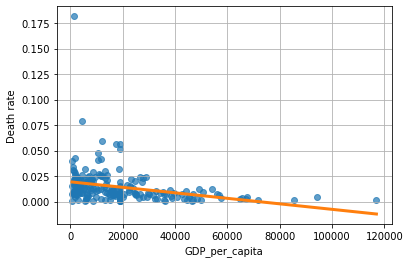

In [120]:

X = df_main['GDP_per_capita'].values
Y = df_main['Death_rate'].values

model = LinearRegression()
model.fit(X.reshape(-1,1), Y)

X_fit = np.linspace(X.min(), X.max(), 100)
Y_fit = model.predict(X_fit.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_fit, Y_fit, color='tab:orange', linewidth=3)

plt.xlabel('GDP_per_capita')
plt.ylabel('Death rate')
plt.grid()
plt.show()


pozbędę się outlier'ów

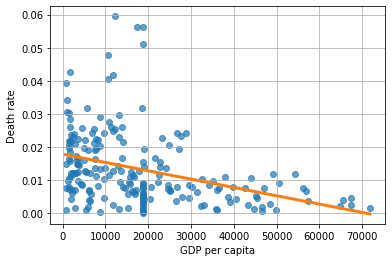

In [131]:

df_temp = df_main[(df_main.Death_rate < 0.075) & (df_main.GDP_per_capita < 80000)]
X = df_temp['GDP_per_capita'].values
Y = df_temp['Death_rate'].values
model = LinearRegression()
model.fit(X.reshape(-1,1), Y)

X_fit = np.linspace(X.min(), X.max(), 100)
Y_fit = model.predict(X_fit.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_fit, Y_fit, color='tab:orange', linewidth=3)

plt.xlabel('GDP per capita')
plt.ylabel('Death rate')
plt.grid()
plt.savefig('images/death_gdp.png')
plt.show()


In [132]:
r = np.corrcoef(X, Y.astype('float32')) # współczynnik korelacji
r[0, 1]

-0.3619998653852638